In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.core import *

In [3]:
path = "/Users/keerat/Documents/Research/input/"

In [4]:
bs = 64

data = ImageDataBunch.from_folder(path, valid_pct = 0.10,
                                  ds_tfms=get_transforms(do_flip = True), 
                                  size=224,
                                  bs=bs,
                                 num_workers = 0)
#data.normalize(cifar_stats)

In [28]:
data.classes

['Type_1', 'Type_2', 'Type_3']

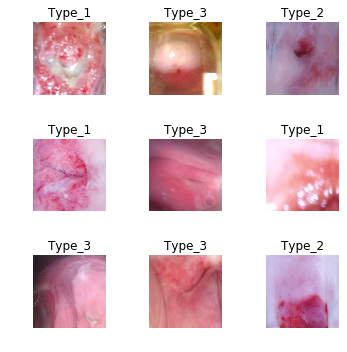

In [29]:
data.show_batch(rows=3, figsize=(5,5))

In [5]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

In [6]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy


KeyboardInterrupt: 

In [32]:
learn.save('v2-stage-1-34')

In [33]:
learn.unfreeze()

In [34]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


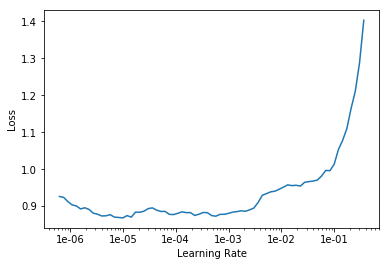

In [35]:
learn.recorder.plot()

In [36]:
learn.fit_one_cycle(16, slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy
1,0.880527,0.841816,0.617886
2,0.872416,0.853349,0.626016
3,0.879654,0.843172,0.626016
4,0.868751,0.838700,0.617886
5,0.844167,0.831450,0.634146
6,0.820318,0.826364,0.626016
7,0.807243,0.823015,0.617886
8,0.790007,0.806835,0.650406
9,0.775841,0.805962,0.642276
10,0.761564,0.806986,0.650406


In [37]:
learn.save('v2-stage-2-34')

In [7]:
learn.load('v2-stage-2-34')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (1113 items)
[Category Type_1, Category Type_1, Category Type_1, Category Type_1, Category Type_1]...
Path: /Users/keerat/Documents/Research/input
x: ImageItemList (1113 items)
[Image (3, 1902, 1306), Image (3, 1773, 1185), Image (3, 2547, 991), Image (3, 1612, 1838), Image (3, 1734, 1625)]...
Path: /Users/keerat/Documents/Research/input;

Valid: LabelList
y: CategoryList (123 items)
[Category Type_2, Category Type_3, Category Type_2, Category Type_2, Category Type_2]...
Path: /Users/keerat/Documents/Research/input
x: ImageItemList (123 items)
[Image (3, 2547, 2273), Image (3, 918, 918), Image (3, 2418, 2588), Image (3, 1045, 1090), Image (3, 2014, 994)]...
Path: /Users/keerat/Documents/Research/input;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [8]:
interp = ClassificationInterpretation.from_learner(learn)

In [9]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [15]:
learn.load('v2-stage-2-34')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (1113 items)
[Category Type_1, Category Type_1, Category Type_1, Category Type_1, Category Type_1]...
Path: /Users/keerat/Documents/Research/input
x: ImageItemList (1113 items)
[Image (3, 1902, 1306), Image (3, 1773, 1185), Image (3, 2547, 991), Image (3, 1612, 1838), Image (3, 1734, 1625)]...
Path: /Users/keerat/Documents/Research/input;

Valid: LabelList
y: CategoryList (123 items)
[Category Type_2, Category Type_3, Category Type_2, Category Type_2, Category Type_2]...
Path: /Users/keerat/Documents/Research/input
x: ImageItemList (123 items)
[Image (3, 2547, 2273), Image (3, 918, 918), Image (3, 2418, 2588), Image (3, 1045, 1090), Image (3, 2014, 994)]...
Path: /Users/keerat/Documents/Research/input;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [17]:
learn.unfreeze()

In [18]:
learn.fit_one_cycle(3, slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,accuracy
1,0.711545,0.524634,0.788618
2,0.717753,0.577115,0.764228
3,0.651950,0.551849,0.780488


In [19]:
learn.save('v2-stage-3-34')

In [20]:
learn.unfreeze()

In [21]:
learn.fit_one_cycle(3, slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy
1,0.572956,0.538951,0.796748
2,0.549181,0.541447,0.796748
3,0.529694,0.538112,0.813008


In [22]:
learn.save('v2-stage-4-34')

In [23]:
learn.unfreeze()

In [24]:
learn.fit_one_cycle(10, slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy
1,0.530719,0.540902,0.804878
2,0.531053,0.540537,0.804878
3,0.518375,0.551935,0.780488
4,0.526340,0.546983,0.780488
5,0.517036,0.544945,0.764228
6,0.490118,0.544117,0.780488
7,0.474908,0.545119,0.772358
8,0.467663,0.543312,0.764228
9,0.460128,0.531525,0.780488
10,0.453615,0.544469,0.772358
